<a href="https://colab.research.google.com/github/Thulayb2021/Thulayb_w1905642_20211252/blob/main/Thulayb_w1905642_20211252.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importation of Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# **Loading of Dataset**

In [ ]:
obesity_data = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# **Exploratory Data Analysis**

**Dataset Information**

In [ ]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Checking For Null Values**

In [ ]:
obesity_data.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


**Dataset Description**

In [ ]:
obesity_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Removal of Target Variable**

In [ ]:
target_column = 'NObeyesdad'
features_data = obesity_data.drop(columns=[target_column,"Weight","Height"])

**Exploration Of Numerical Variables**

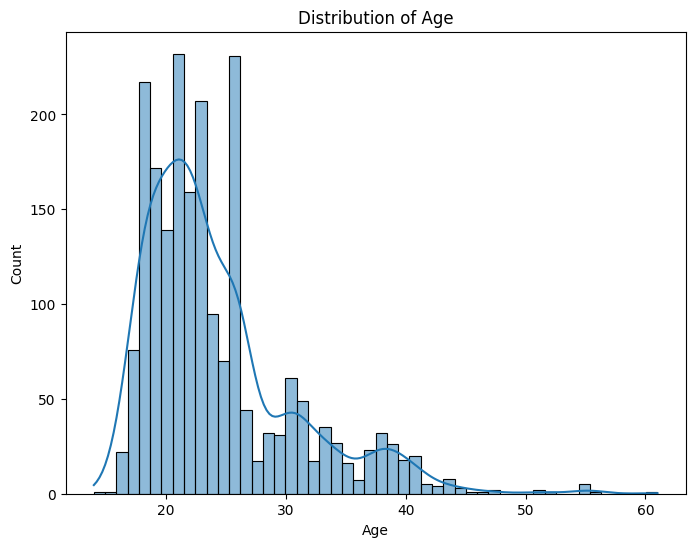

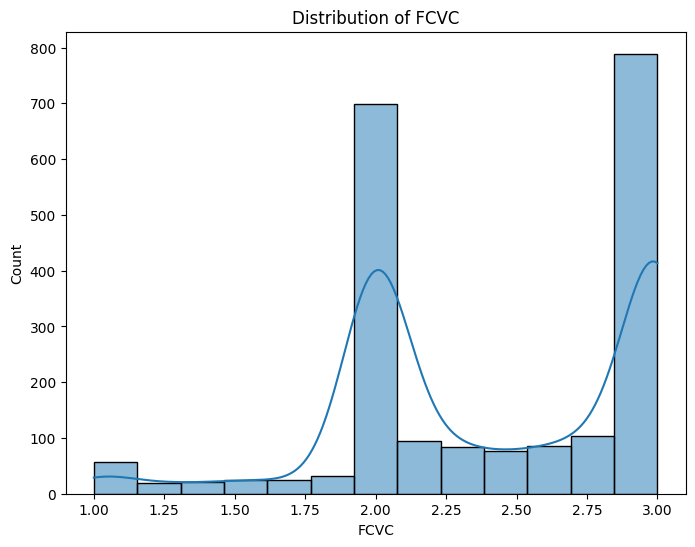

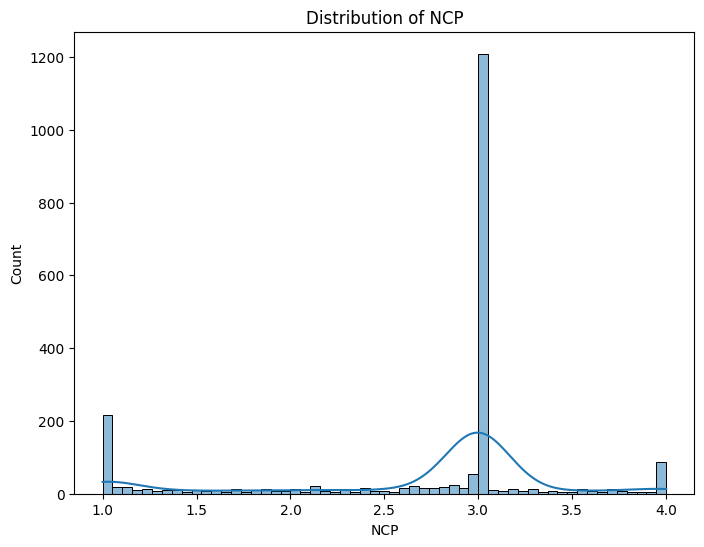

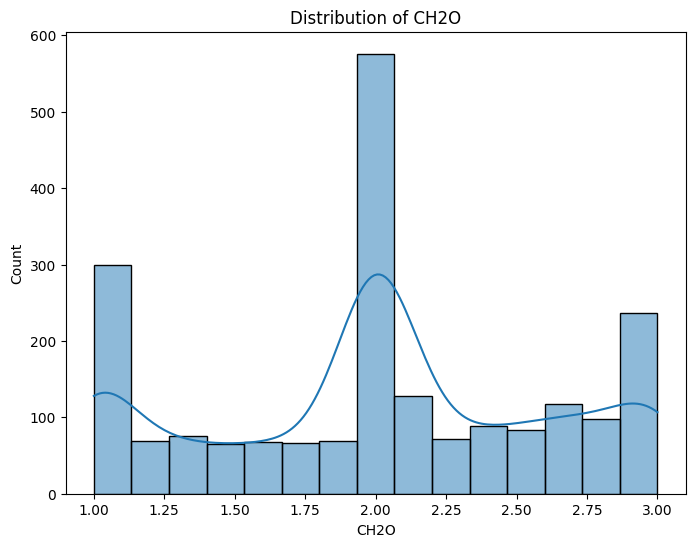

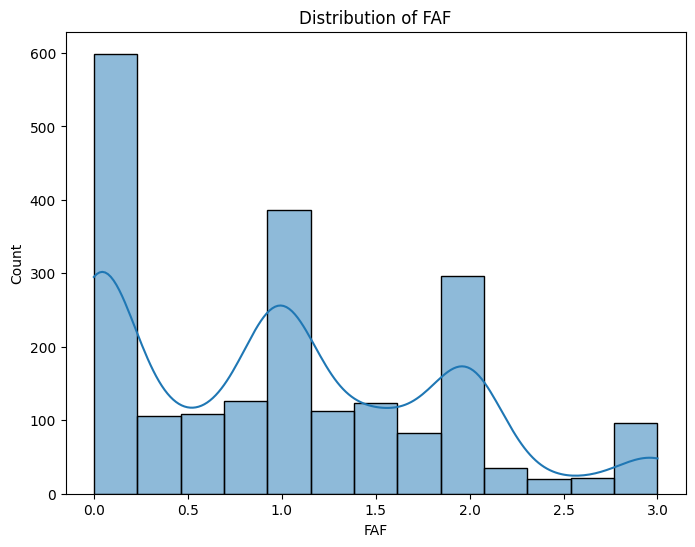

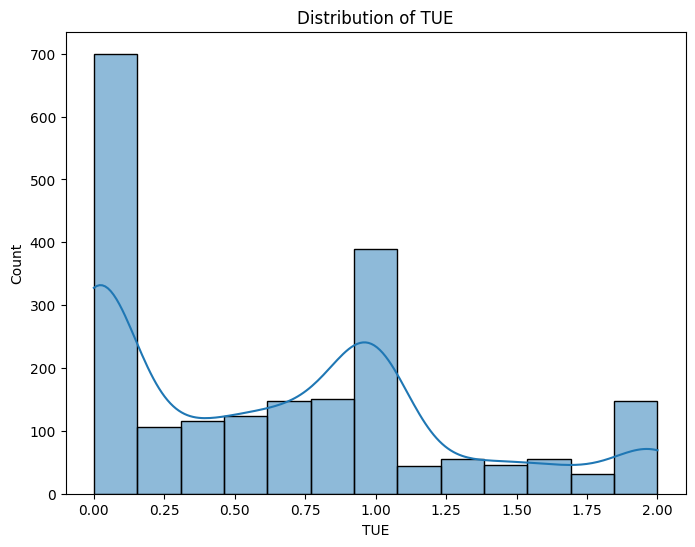

In [ ]:
numeric_cols = features_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(obesity_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

**Exploration Of Categorical Variables**

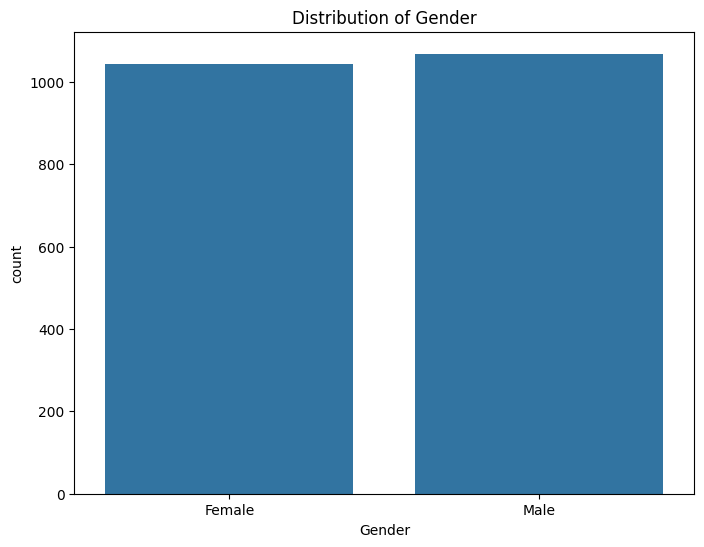

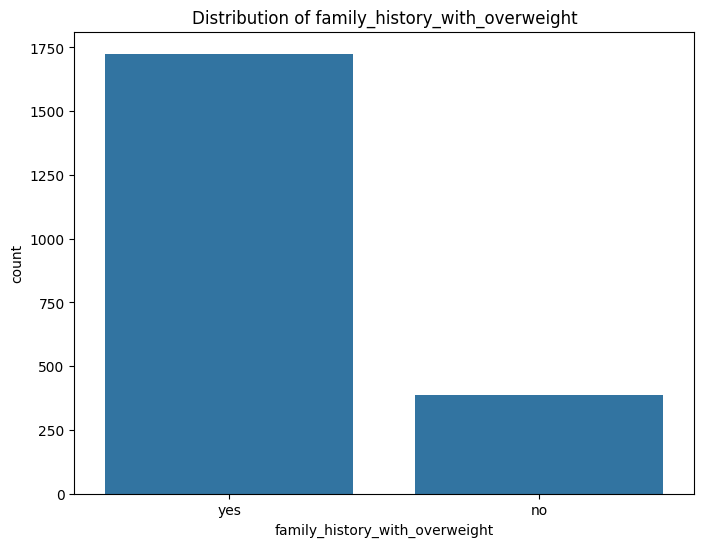

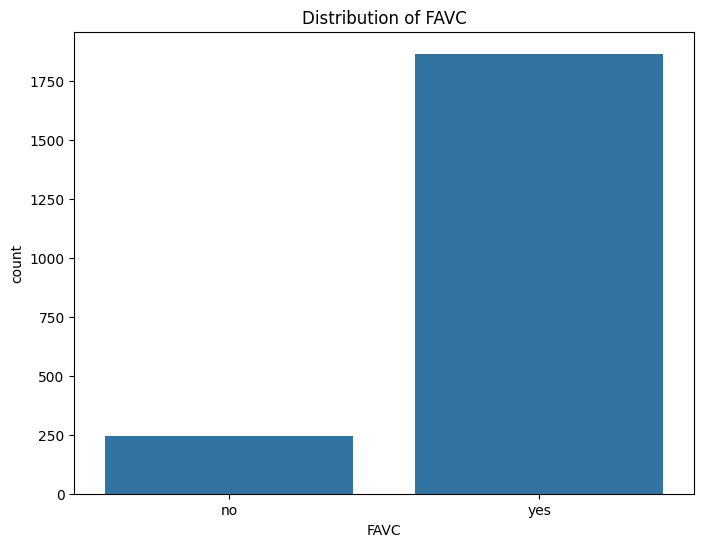

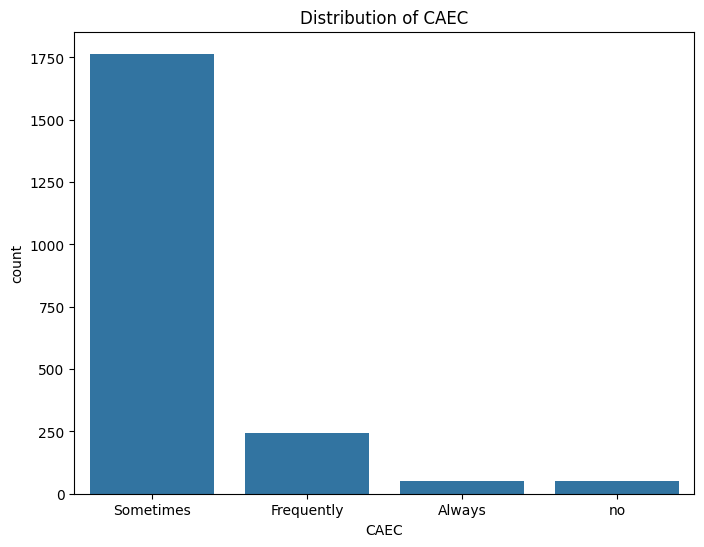

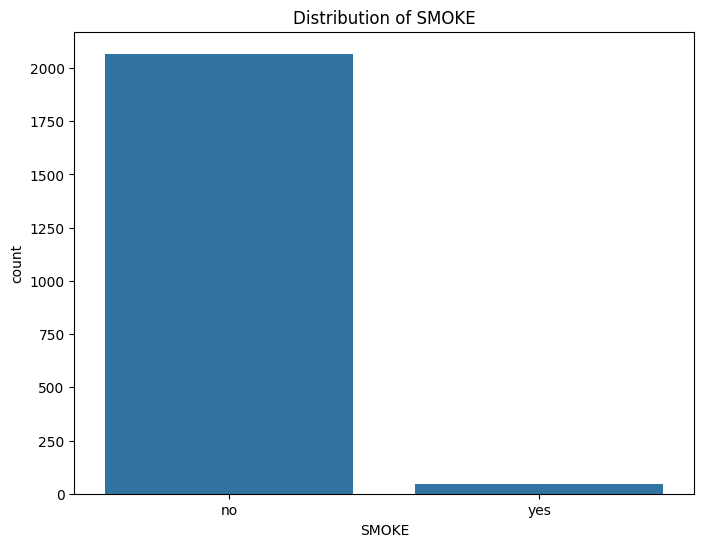

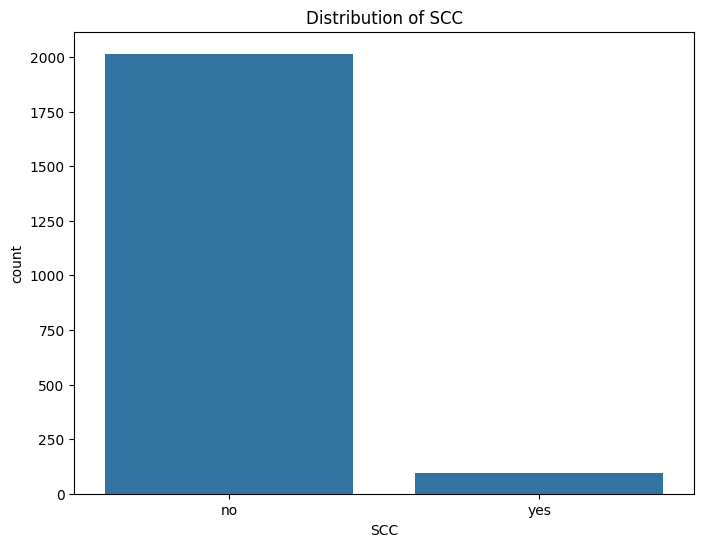

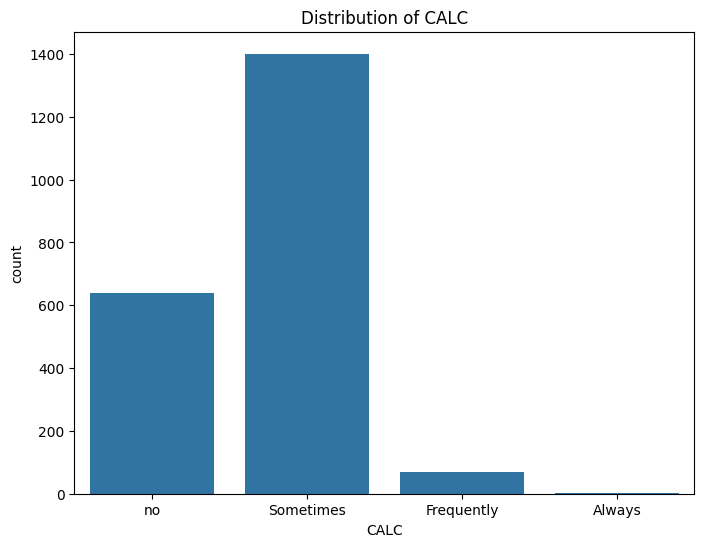

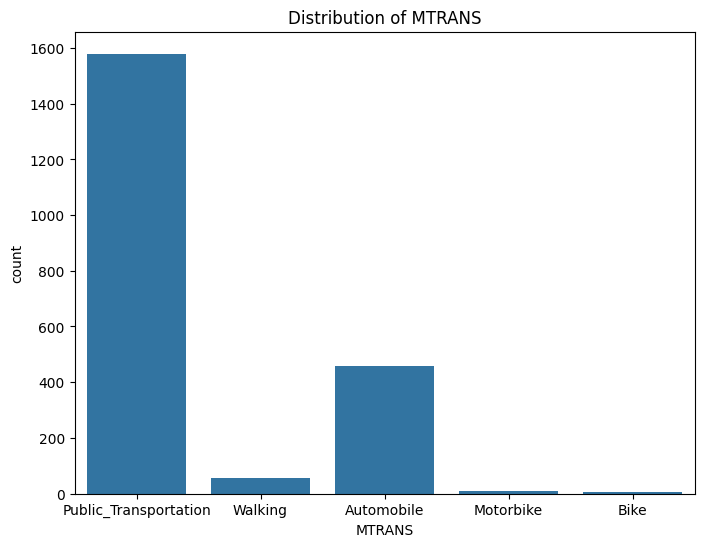

In [ ]:
categorical_cols = features_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=obesity_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

**Visualizing Correlation Heatmap For Numerical Variables**

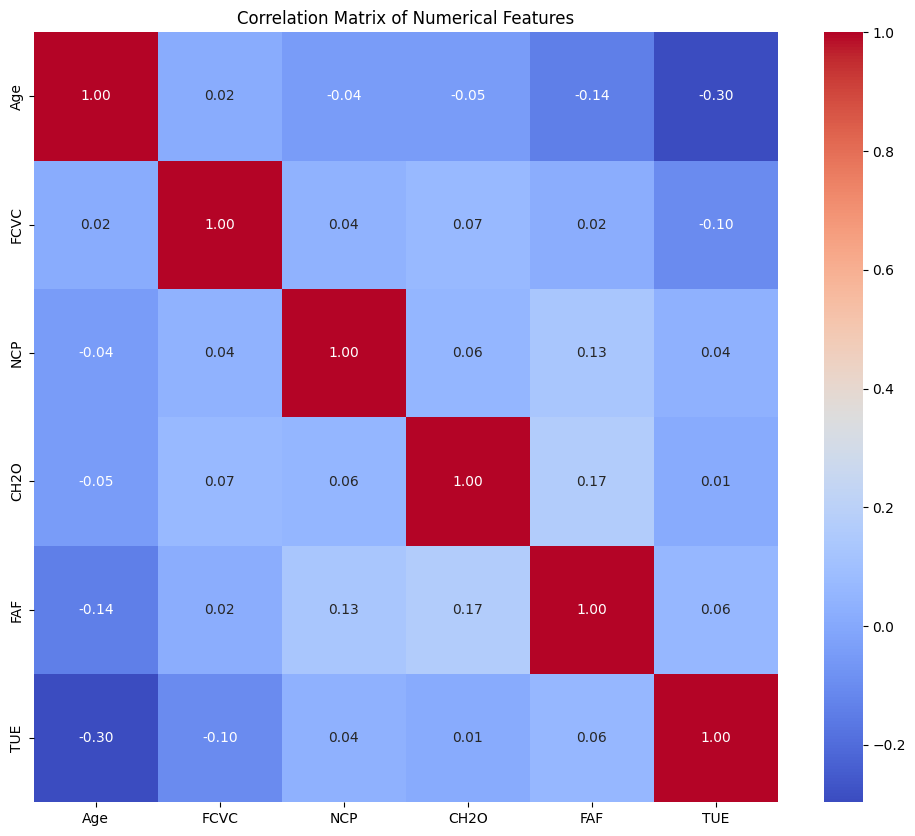

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = features_data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Data Pre-Processing**

**One-Hot Encoding for Categorical Variables**

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(features_data[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

encoded_categorical_df.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Concatenating Numerical Variables**

In [ ]:
encoded_data = pd.concat([features_data[numeric_cols].reset_index(drop=True), encoded_categorical_df], axis=1)
encoded_data

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Normalization Of Both Numerical & Categorical Variables Using StandardScaler**

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)
scaled_df = pd.DataFrame(scaled_data, columns=encoded_data.columns)

scaled_df.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.785019,0.404153,-0.013073,-1.188039,0.561997,-1.011914,0.472291,-2.759769,-0.359835,...,-0.157344,-0.145900,-0.218272,-0.185194,-1.404720,1.517761,-0.05768,-0.072375,0.579721,-0.165078
1,-0.522124,1.088342,0.404153,1.618759,2.339750,-1.080625,-1.011914,0.472291,-2.759769,-0.359835,...,-0.157344,6.853997,4.581439,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078
2,-0.206889,-0.785019,0.404153,-0.013073,1.163820,0.561997,0.988227,0.472291,-2.759769,-0.359835,...,-0.157344,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,0.579721,-0.165078
3,0.423582,1.088342,0.404153,-0.013073,1.163820,-1.080625,0.988227,-2.117337,-2.759769,-0.359835,...,-0.157344,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,-1.724969,6.057758
4,-0.364507,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0.988227,-2.117337,-2.759769,-0.359835,...,-0.157344,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078


**Correlation Heatmap For Scaled Data**

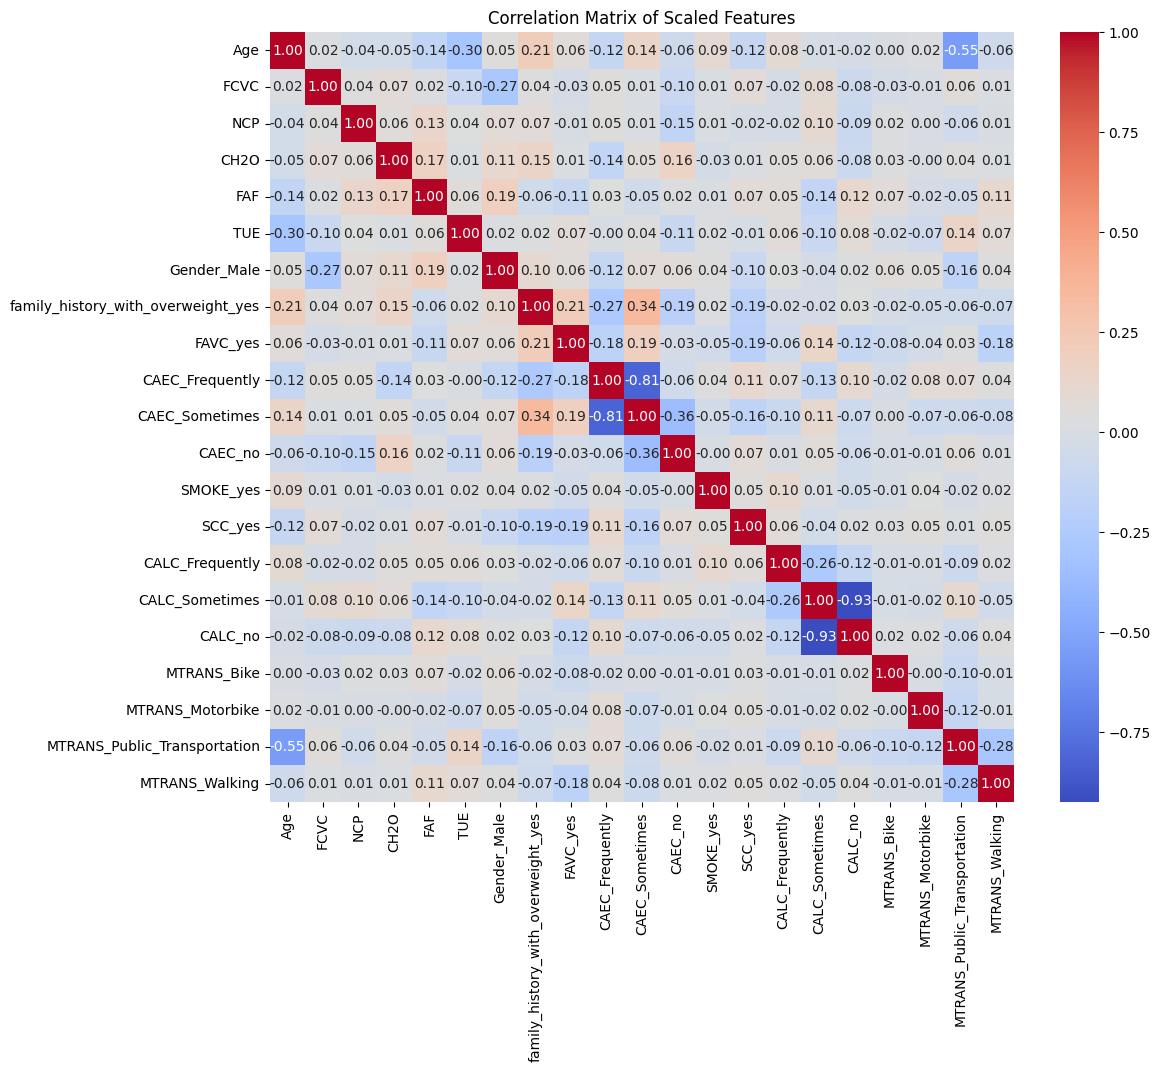

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix_scaled = scaled_df.corr()
sns.heatmap(correlation_matrix_scaled, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Features')
plt.show()

# **Unsupervised Machine Learning: K-means Clustering**

**Determination of Clusters: Elbow Method**

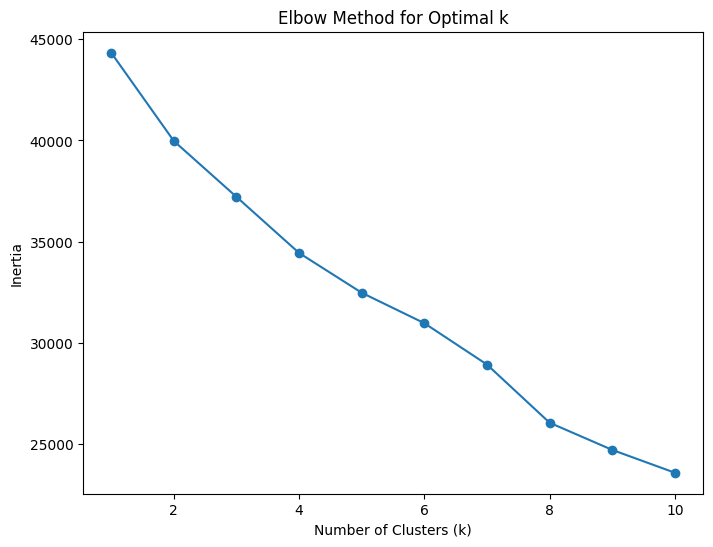

In [ ]:
from sklearn.cluster import KMeans


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

**Determination of Clusters: Silhouette Plot**

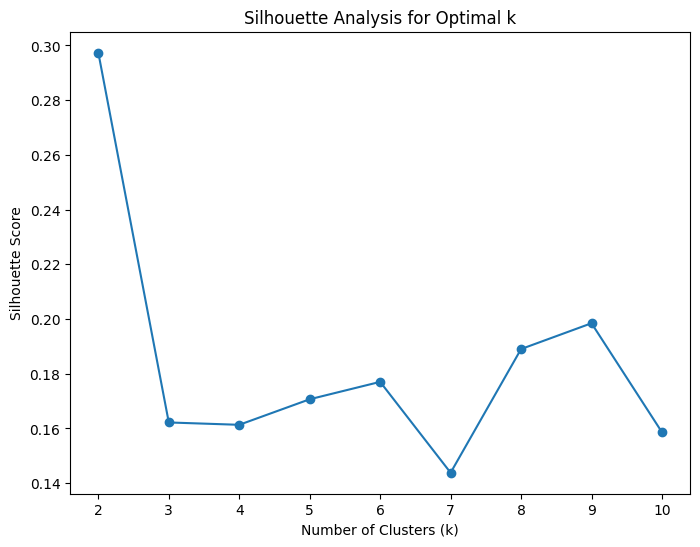

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

**Performing K-means**

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

**Visualizing Clusters for Each Pair of Variables**

In [ ]:
for i in range(len(scaled_df.columns)):
    for j in range(i + 1, len(scaled_df.columns)):
        plt.figure(figsize=(8, 6))
        plt.scatter(scaled_df.iloc[:, i], scaled_df.iloc[:, j], c=cluster_labels, cmap='viridis')
        plt.title(f'Clusters of {scaled_df.columns[i]} vs {scaled_df.columns[j]}')
        plt.xlabel(scaled_df.columns[i])
        plt.ylabel(scaled_df.columns[j])
        plt.colorbar(label='Cluster')
        plt.show()

**Implementing "Cluster" Column As a New Variable**

In [ ]:
scaled_df['Cluster'] = cluster_labels
scaled_df

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster
0,-0.522124,-0.785019,0.404153,-0.013073,-1.188039,0.561997,-1.011914,0.472291,-2.759769,-0.359835,...,-0.145900,-0.218272,-0.185194,-1.404720,1.517761,-0.05768,-0.072375,0.579721,-0.165078,2
1,-0.522124,1.088342,0.404153,1.618759,2.339750,-1.080625,-1.011914,0.472291,-2.759769,-0.359835,...,6.853997,4.581439,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,1
2,-0.206889,-0.785019,0.404153,-0.013073,1.163820,0.561997,0.988227,0.472291,-2.759769,-0.359835,...,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,2
3,0.423582,1.088342,0.404153,-0.013073,1.163820,-1.080625,0.988227,-2.117337,-2.759769,-0.359835,...,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,-1.724969,6.057758,3
4,-0.364507,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0.988227,-2.117337,-2.759769,-0.359835,...,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,1.088342,0.404153,-0.456705,0.783135,0.407996,-1.011914,0.472291,0.362349,-0.359835,...,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,1
2107,-0.367195,1.088342,0.404153,-0.004702,0.389341,-0.096251,-1.011914,0.472291,0.362349,-0.359835,...,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,1
2108,-0.281909,1.088342,0.404153,0.075361,0.474971,-0.019018,-1.011914,0.472291,0.362349,-0.359835,...,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,1
2109,0.007776,1.088342,0.404153,1.377801,0.151471,-0.117991,-1.011914,0.472291,0.362349,-0.359835,...,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,1


**Visualizing Feature Contribution For Each Cluster**

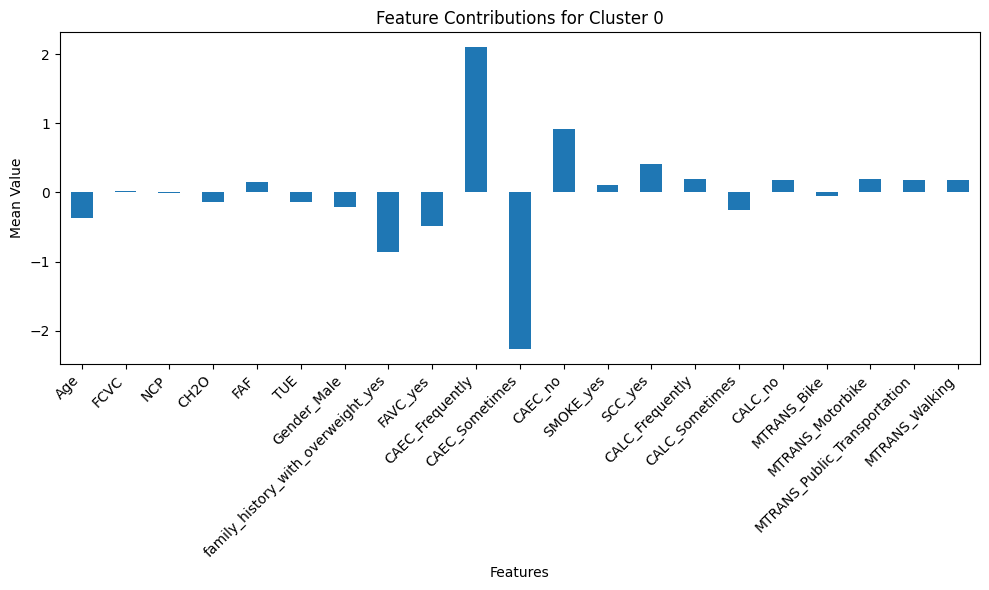

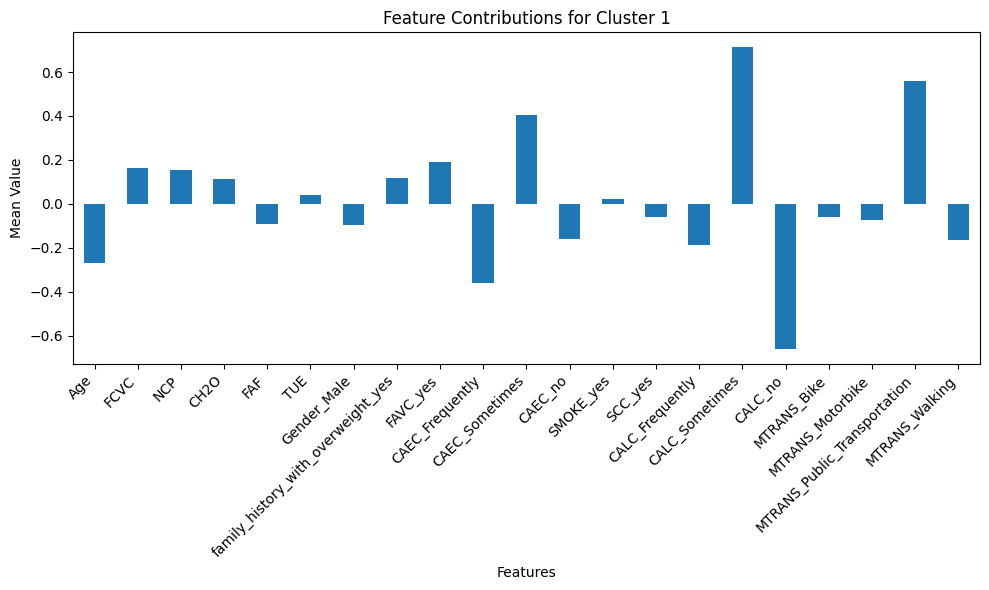

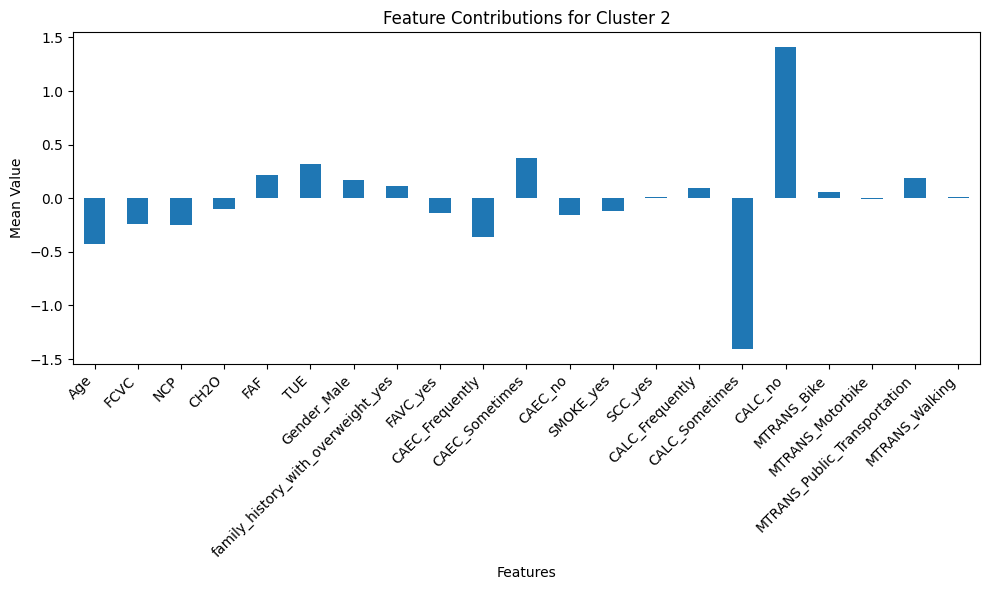

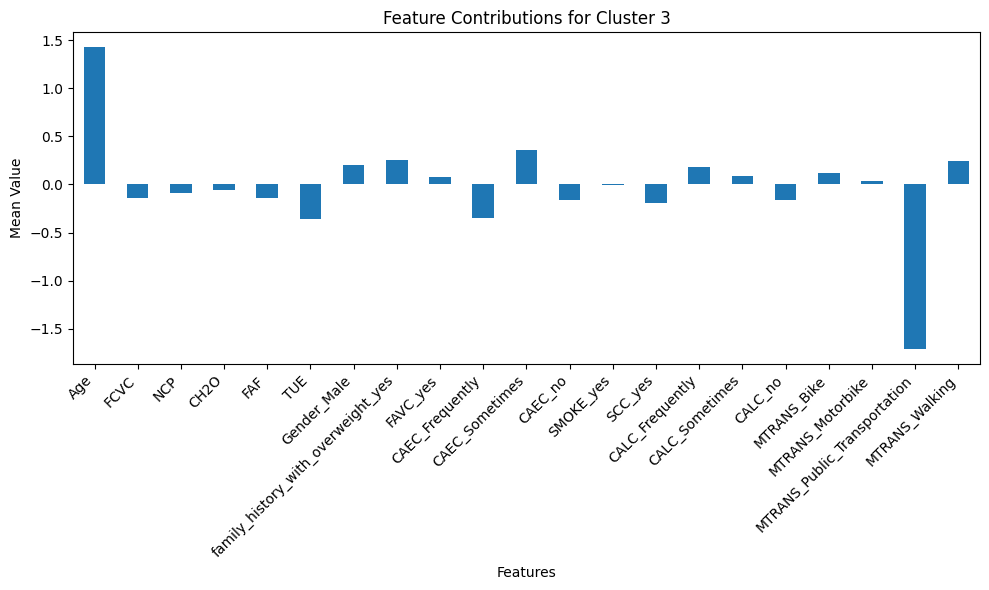

In [ ]:
feature_contributions = {}
for cluster_num in range(k):
    cluster_data = scaled_df[scaled_df['Cluster'] == cluster_num]
    feature_contributions[cluster_num] = cluster_data.drop('Cluster', axis=1).mean()


for cluster_num, contributions in feature_contributions.items():
    plt.figure(figsize=(10, 6))
    contributions.plot(kind='bar')
    plt.title(f'Feature Contributions for Cluster {cluster_num}')
    plt.xlabel('Features')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Supervised Machine Learning: Decision Trees**

**Preparation Of Data**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X = scaled_df
y = obesity_data['NObeyesdad']

**Splitting Of Data Into Test & Training Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initializing & Training The Decision Tree Classifier**

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Making Predictions On The Test Set**

In [ ]:
y_pred = dt_classifier.predict(X_test)

**Evaluation Of The Model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

print(classification_report(y_test, y_pred))


Accuracy: 0.7399527186761229
Precision: 0.7353859156660368
Recall: 0.7399527186761229
Confusion Matrix:
[[47  6  0  0  1  1  1]
 [ 8 33  5  1  2  8  5]
 [ 2  6 51  5  0  6  8]
 [ 0  1  0 53  0  2  2]
 [ 0  0  0  0 63  0  0]
 [ 2  6  4  1  0 38  5]
 [ 1  5  8  4  0  4 28]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.84      0.81        56
      Normal_Weight       0.58      0.53      0.55        62
     Obesity_Type_I       0.75      0.65      0.70        78
    Obesity_Type_II       0.83      0.91      0.87        58
   Obesity_Type_III       0.95      1.00      0.98        63
 Overweight_Level_I       0.64      0.68      0.66        56
Overweight_Level_II       0.57      0.56      0.57        50

           accuracy                           0.74       423
          macro avg       0.73      0.74      0.73       423
       weighted avg       0.74      0.74      0.74       423



# **Supervised Machine Learning: Random Forest Classifier**

**Preparation Of Data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = scaled_df
y = obesity_data['NObeyesdad']

**Splitting Of Data Into Test & Training Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initializing & Training The Random Forest Classifier**

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Making Predictions On The Test Set**

In [ ]:
y_pred = rf_classifier.predict(X_test)

**Evaluation Of Model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

print(classification_report(y_test, y_pred))

Accuracy: 0.8581560283687943
Precision: 0.8663274466465956
Recall: 0.8581560283687943
Confusion Matrix:
[[51  2  0  0  0  3  0]
 [ 3 49  4  1  0  3  2]
 [ 0  7 67  4  0  0  0]
 [ 0  3  1 54  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0 10  3  1  0 42  0]
 [ 1  3  5  3  0  1 37]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.91      0.92        56
      Normal_Weight       0.66      0.79      0.72        62
     Obesity_Type_I       0.84      0.86      0.85        78
    Obesity_Type_II       0.86      0.93      0.89        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.75      0.80        56
Overweight_Level_II       0.95      0.74      0.83        50

           accuracy                           0.86       423
          macro avg       0.87      0.85      0.86       423
       weighted avg       0.87      0.86      0.86       423



**Visualization Of Fearture Importance From The Trained Random Forest Classifier**

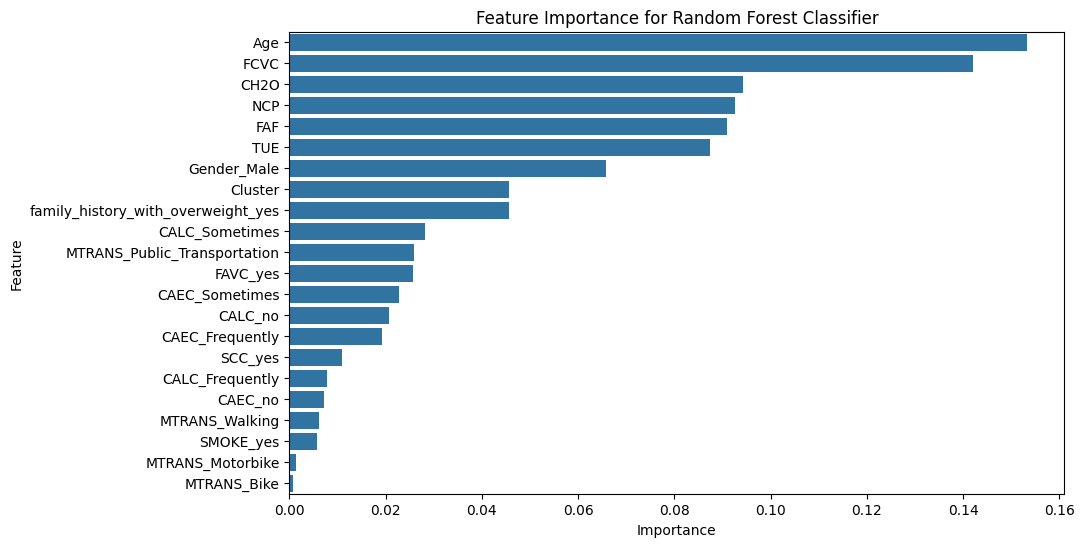

In [ ]:
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **Supervised Machine Learning: XGBoost**

**Preparation Of Data**

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

X = scaled_df
y = obesity_data['NObeyesdad']

**Initializing LabelEncoder**

In [ ]:
label_encoder = LabelEncoder()

**Fit & Transform Target Variable**

In [ ]:
y_encoded = label_encoder.fit_transform(y)

**Splitting Of Data Into Test & Training Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

**Initializing & Training XGBoost**

In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

**Making Predictions On The Test Set**

In [ ]:
y_pred_encoded = xgb_classifier.predict(X_test)

**Inverse Transform Predictions To Original Labels**

In [ ]:
y_pred = label_encoder.inverse_transform(y_pred_encoded)

**Inverse Transform y_test For Evaluation**

In [ ]:
y_test_original = label_encoder.inverse_transform(y_test)

**Evaluation Of Model**

In [ ]:
accuracy = accuracy_score(y_test_original, y_pred)
precision = precision_score(y_test_original, y_pred, average='weighted')
recall = recall_score(y_test_original, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_original, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

print(classification_report(y_test_original, y_pred))

Accuracy: 0.8274231678486997
Precision: 0.8265479561359026
Recall: 0.8274231678486997
Confusion Matrix:
[[50  2  0  0  0  4  0]
 [ 4 42  2  0  1  7  6]
 [ 0  7 66  3  0  0  2]
 [ 0  3  0 52  0  0  3]
 [ 0  0  0  0 63  0  0]
 [ 1  8  3  1  0 41  2]
 [ 1  1  5  5  1  1 36]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.89      0.89        56
      Normal_Weight       0.67      0.68      0.67        62
     Obesity_Type_I       0.87      0.85      0.86        78
    Obesity_Type_II       0.85      0.90      0.87        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.77      0.73      0.75        56
Overweight_Level_II       0.73      0.72      0.73        50

           accuracy                           0.83       423
          macro avg       0.82      0.82      0.82       423
       weighted avg       0.83      0.83      0.83       423



# **Post Analysis**

**Inverse Transform The Scaled Features**

In [ ]:
unscaled_data = scaler.inverse_transform(scaled_df.drop('Cluster', axis=1))
unscaled_df = pd.DataFrame(unscaled_data, columns=encoded_data.columns)

unscaled_df['Cluster'] = scaled_df['Cluster']
unscaled_df.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster
0,21.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-3.469447e-18,2
1,21.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,1
2,23.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-3.469447e-18,2
3,27.0,3.0,3.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,3
4,22.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,1


**Applying Predicted Labels To The Unscaled Dataset**

In [ ]:
unscaled_df['Predicted_Class'] = rf_classifier.predict(scaled_df)
unscaled_df

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,...,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster,Predicted_Class
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-3.469447e-18,2,Normal_Weight
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,1,Normal_Weight
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-3.469447e-18,2,Normal_Weight
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,3,Overweight_Level_I
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,1,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,1,Obesity_Type_III
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,1,Obesity_Type_III
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,1,Obesity_Type_III
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,1,Obesity_Type_III


**Visualizing Cluster Distribution per Feature (Excluding The "Cluster" & "Predicted_Class" Columns)**

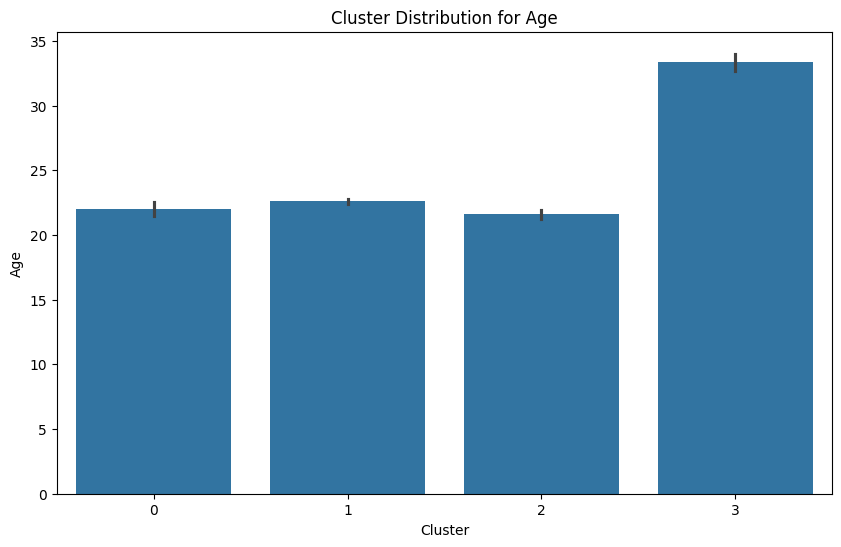

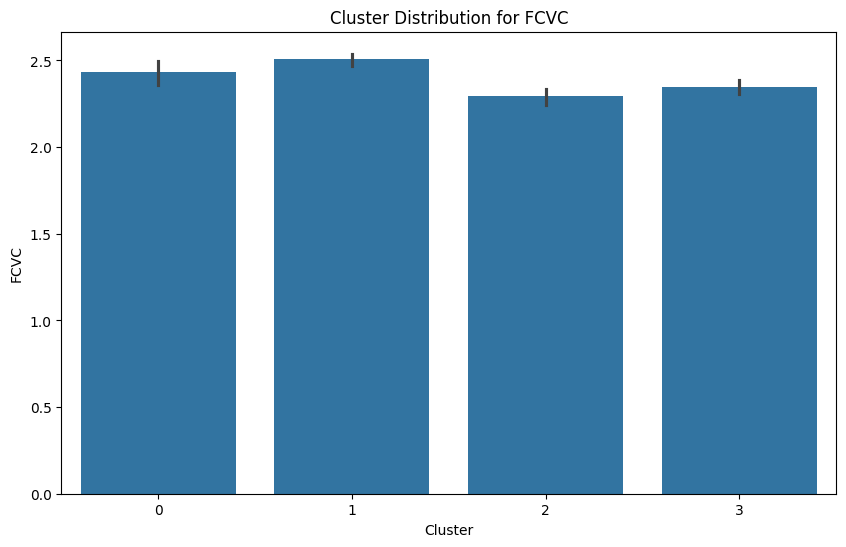

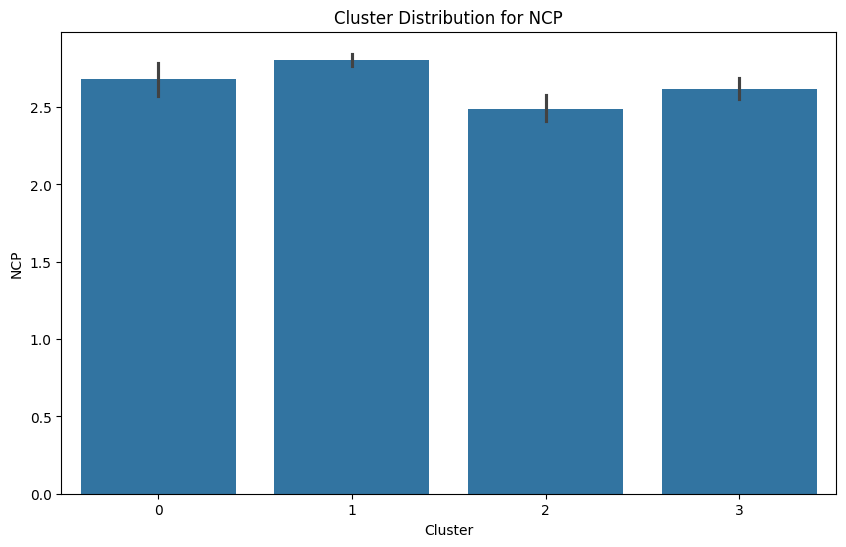

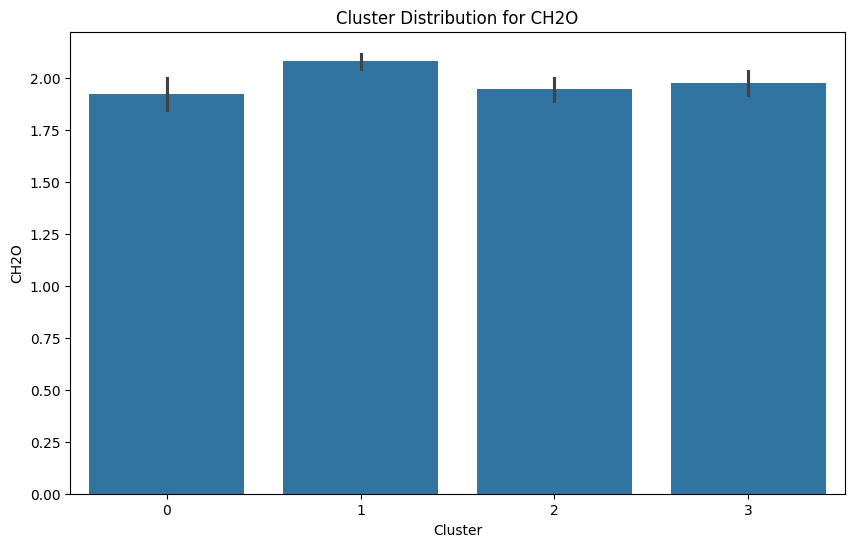

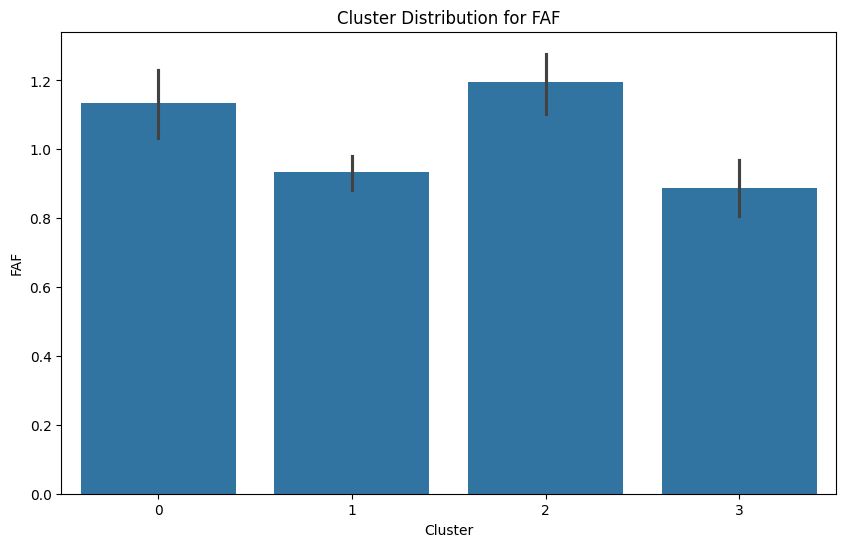

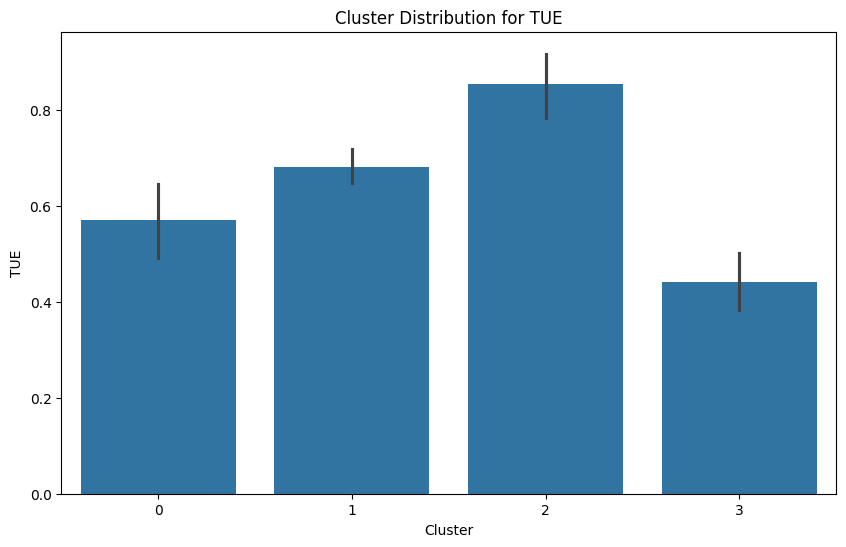

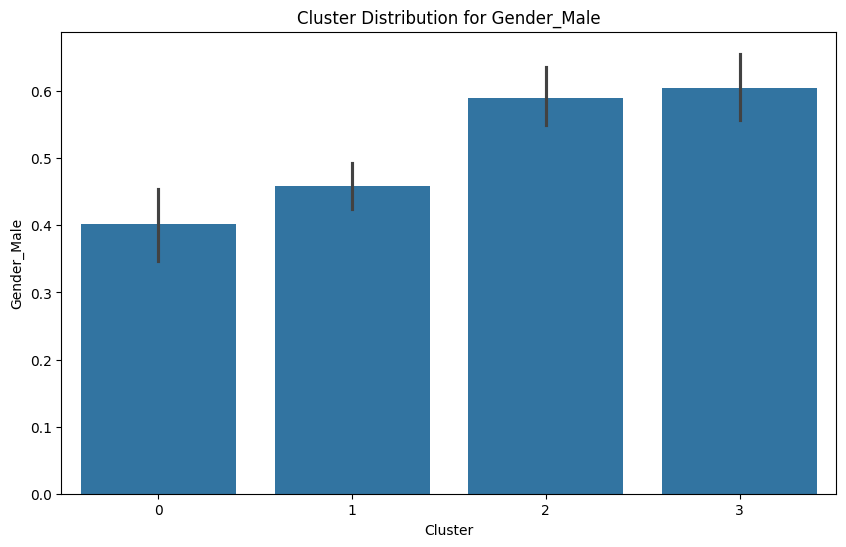

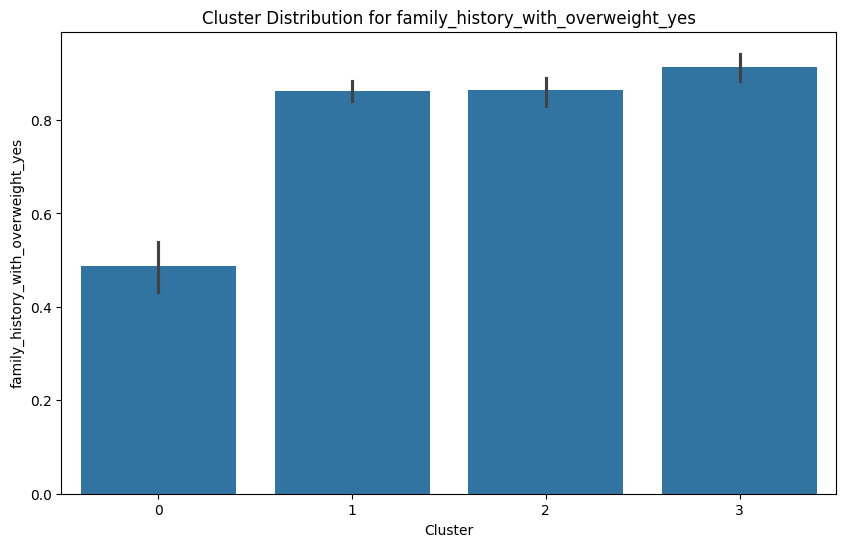

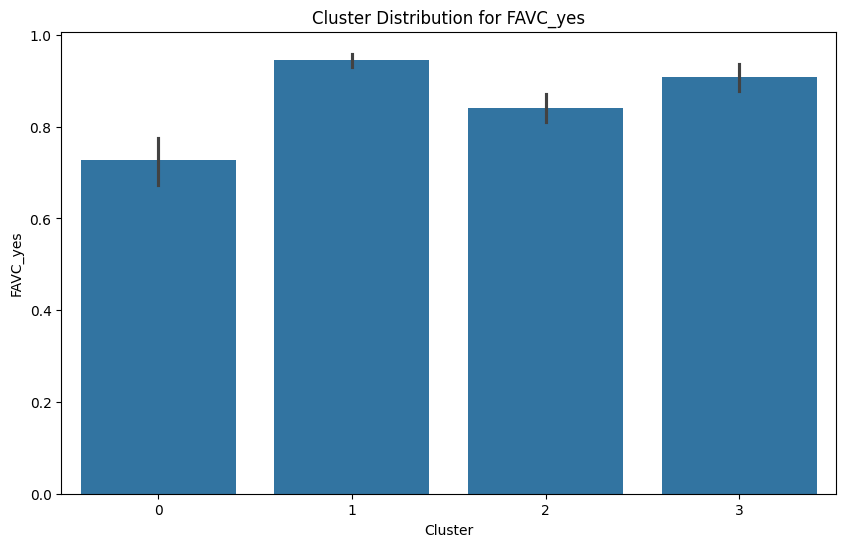

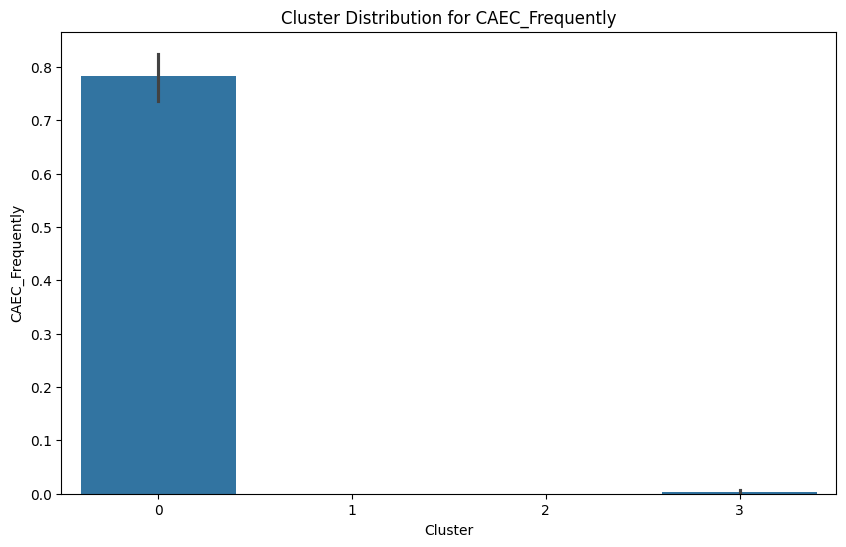

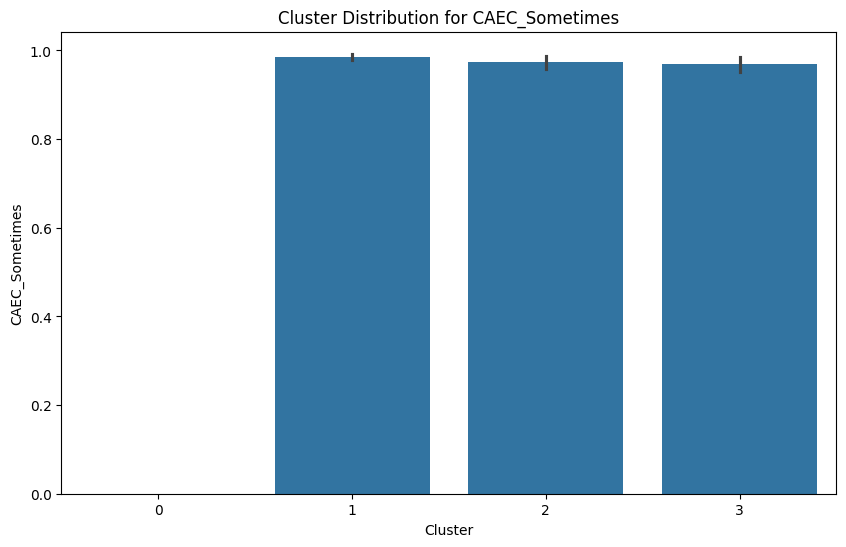

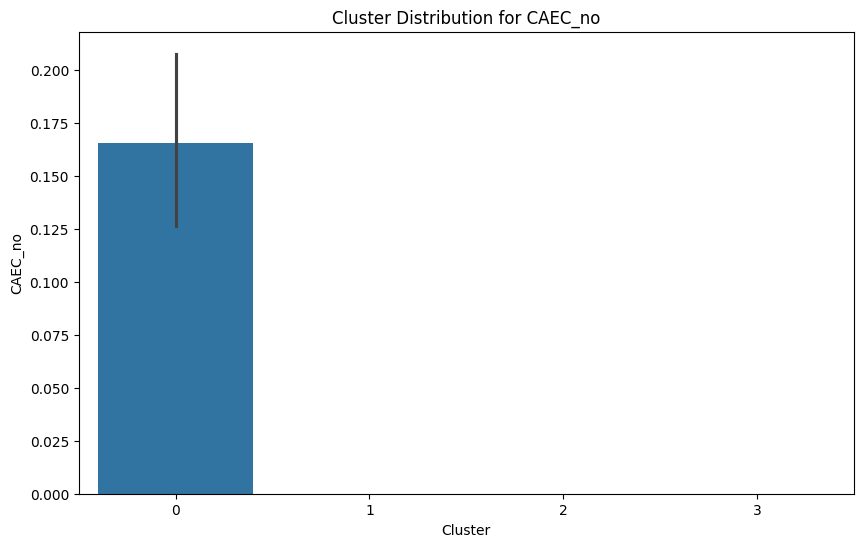

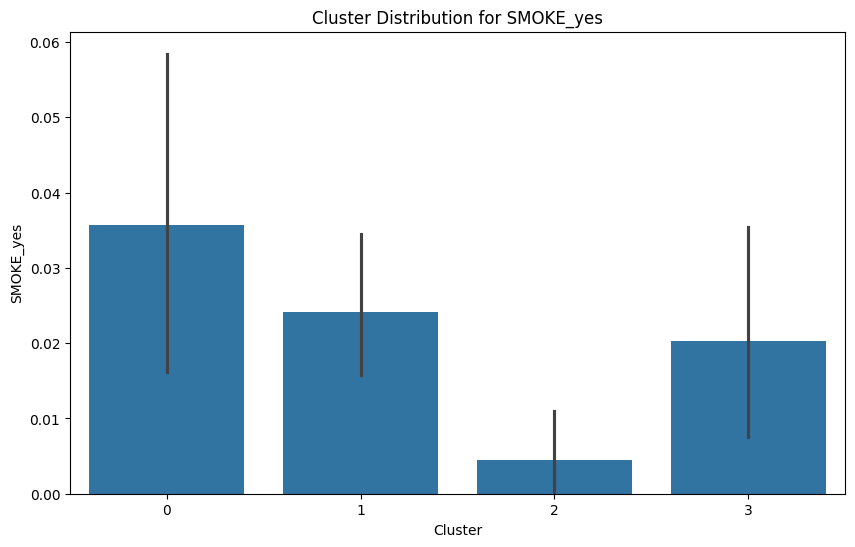

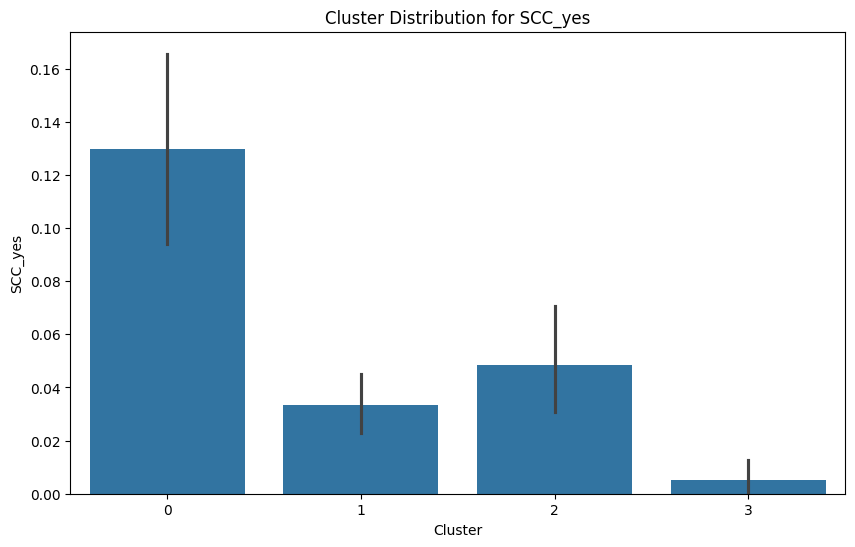

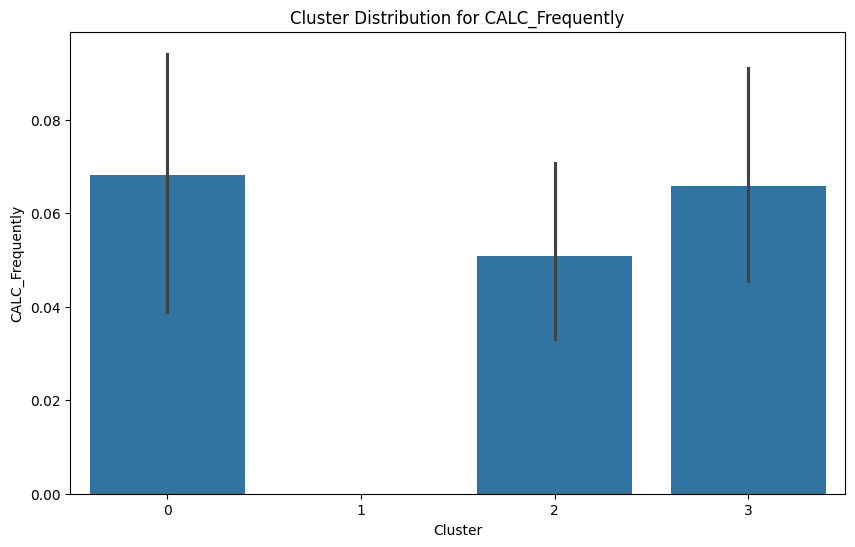

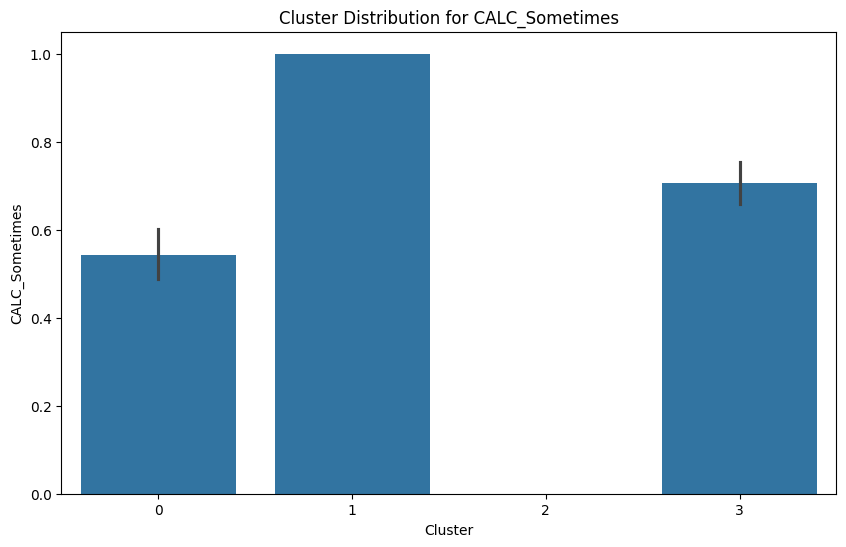

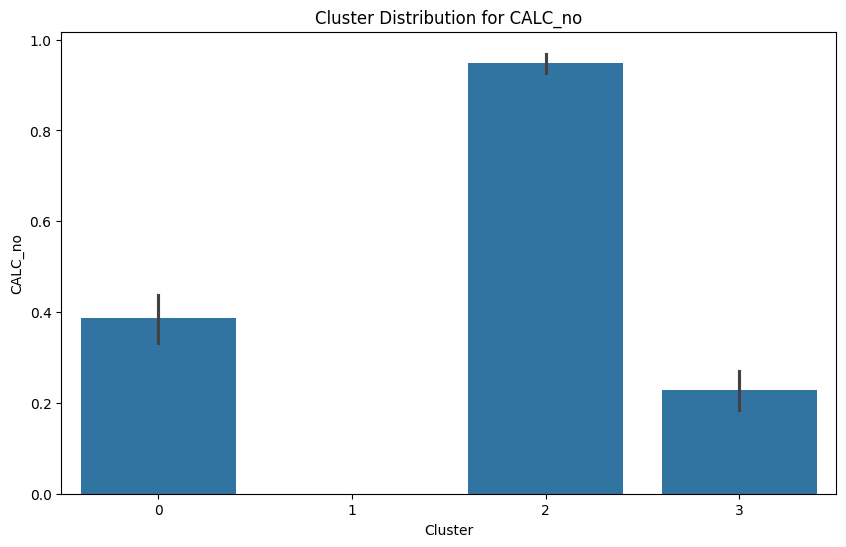

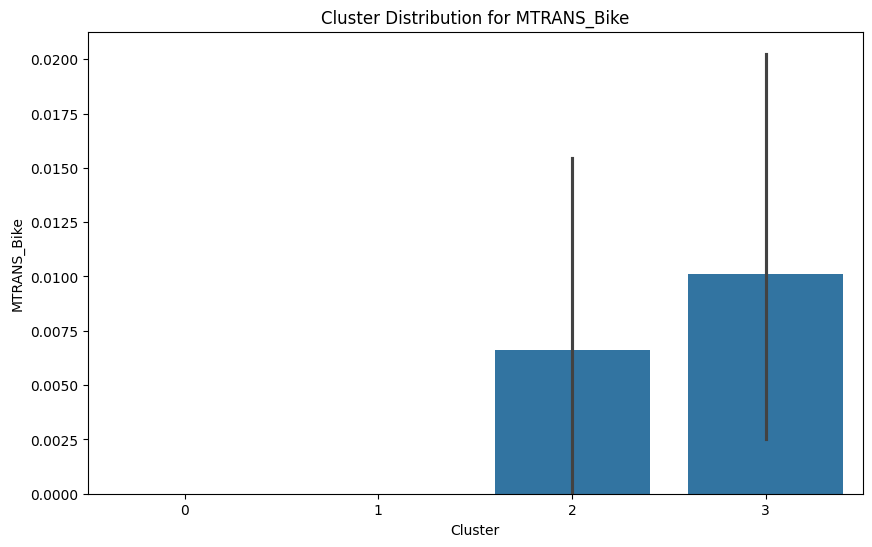

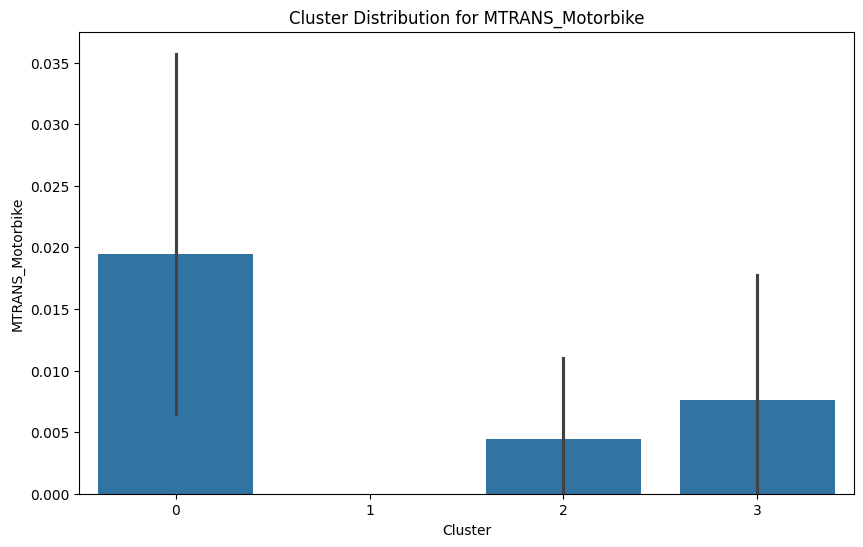

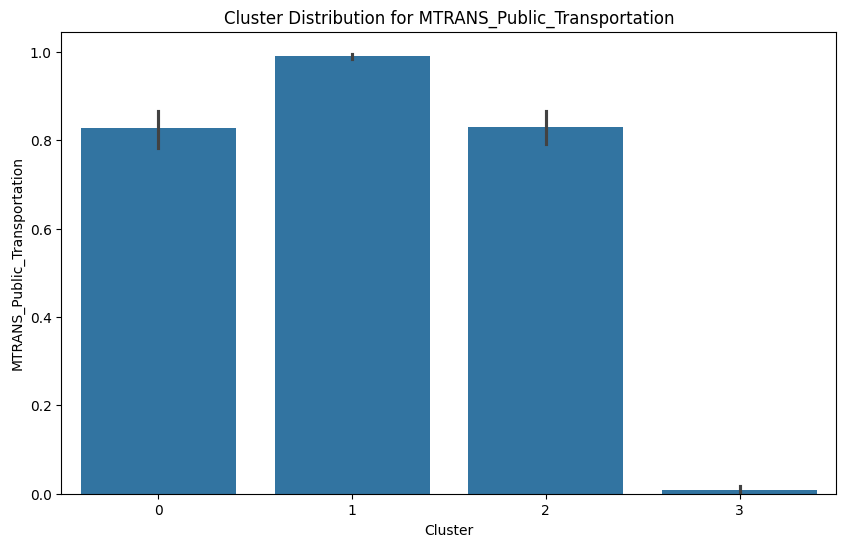

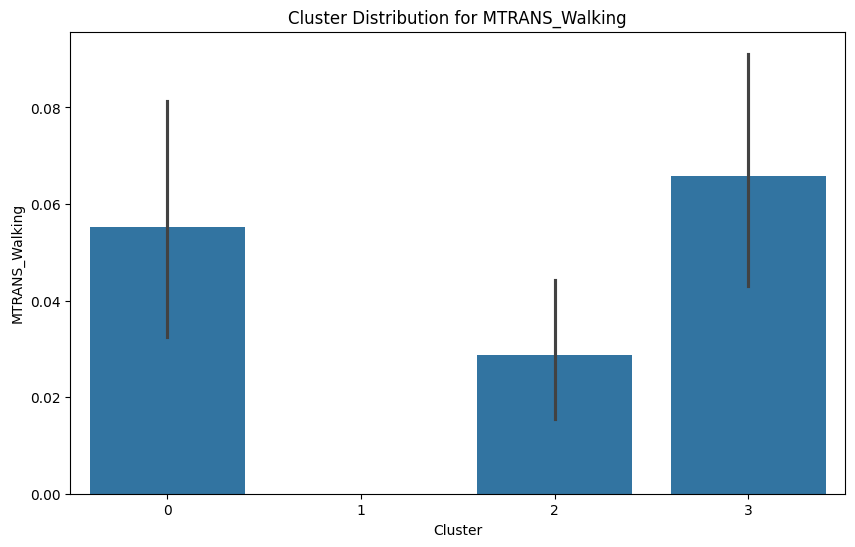

In [ ]:
for col in unscaled_df.columns[:-2]:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Cluster', y=col, data=unscaled_df)
    plt.title(f'Cluster Distribution for {col}')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()

**Visualizing Distribution Of Predicted Class per Cluster**

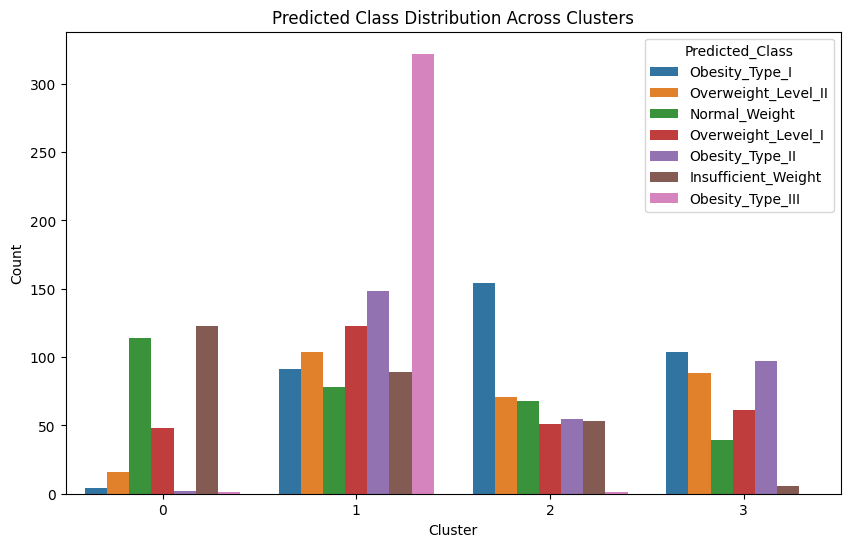

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Predicted_Class', data=unscaled_df)
plt.title('Predicted Class Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

**Visualization Of Precited Class & Actual Obesity Levels**

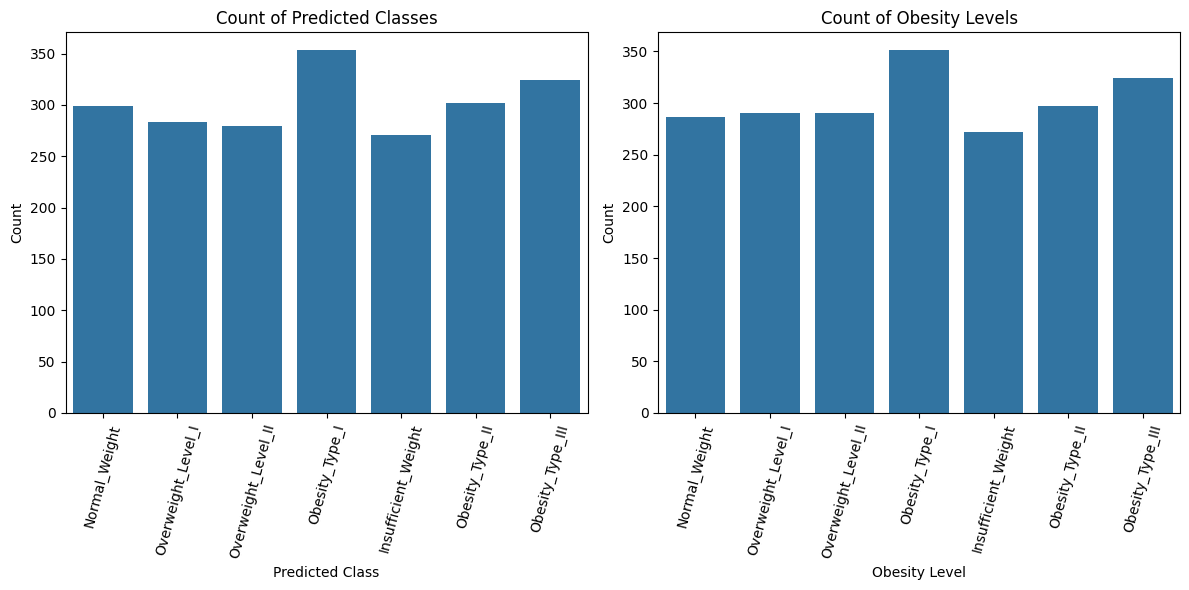

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Predicted_Class', data=unscaled_df)
plt.title('Count of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(rotation=75)

plt.subplot(1, 2, 2)
sns.countplot(x='NObeyesdad', data=obesity_data)
plt.title('Count of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()


**Comparative Difference Between Predicted & Actual Obesity Levels**

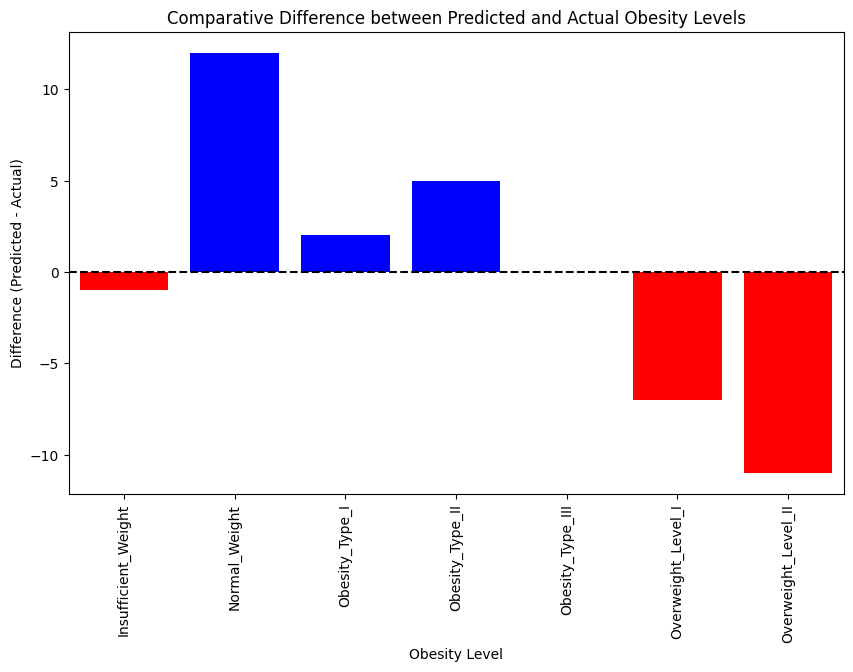

In [ ]:
comparative_difference = unscaled_df["Predicted_Class"].value_counts() - obesity_data["NObeyesdad"].value_counts()

plt.figure(figsize=(10, 6))
comparative_difference.plot(kind='bar')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Comparative Difference between Predicted and Actual Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Difference (Predicted - Actual)')

# Customize bar colors based on difference value
for i, v in enumerate(comparative_difference):
    color = 'red' if v < 0 else 'blue'
    plt.bar(comparative_difference.index[i], v, color=color)

plt.show()

**Conversion Of DataFrame To CSV For Dashboarding Purposes**

In [ ]:
unscaled_df.to_csv('dashboard_data.csv', index=False)